# Analysis of Spotify Data - Data preparation

Data sources: 
- personal data: https://skiley.net/ & http://sortyourmusic.playlistmachinery.com/index.html & data requested from the Spotify website 
- Kaggle: https://www.kaggle.com/rodolfofigueroa/spotify-12m-songs & https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

**Data exploration**

a) Data requested from Spotify (15.02.2021)

In [2]:
import json

In [ ]:
file1 = "C:/Users/Agnieszka/Downloads/Datasets/Music/my_spotify_data/MyData/Playlist1.json"

Spotify_Playlists = json.load(open(file1, "r", encoding="utf8"))
Spotify_Playlists

# File includes information about each playlist - artist, track and album names

In [7]:
playlist_names = []
for index in range(len(Spotify_Playlists['playlists'])):
    playlist_names.append(Spotify_Playlists['playlists'][index]['name'])
    
playlist_names

['Podcasts',
 'Afro Mix',
 'Deep House Mix',
 'Sing',
 'Check',
 'Neo-Soul',
 'Funk / Soul / Disco',
 'Nu-Disco',
 'Jazz (instrumental)',
 'Jazz',
 'Hip Hop',
 'Hip Hop (beats)',
 'Hip Hop Oldschool',
 "Hip Hop (after '00)",
 'Hip Hop PL',
 'Break',
 'Groovy House',
 'Afro House',
 'Deep House',
 'Chill House',
 'Soulful House',
 'House (all)',
 'Electro',
 'Techno',
 'Trap / Breaks',
 'Electronic (classics)',
 'EDM',
 'Roots',
 'Modern roots',
 'Reggae',
 'Dub',
 'World music ',
 'World music (português)',
 'World music (español)',
 'World music (français)',
 'World music (orient & balkan)',
 'Other african sounds',
 'Afrobeat / African Classics',
 'Afrobeats',
 'Kuduro / Naija',
 'SA sounds / Amapiano / Qgom',
 'Dancehall',
 'Dancehall Oldschool',
 'Chillout / Lounge',
 'Deep',
 'Archive / Massive Attack / etc.',
 '...',
 'Slow',
 'Instrumantal / Classic / Soundtrack',
 "Jungle / Drum'n'Bass",
 'Rock / Indie',
 'Indie',
 'Linkin Park',
 'Oldies',
 'Fun',
 'Polskie',
 'Poezja śpiewana

In [66]:
# Number of personal playlists

len(Spotify_Playlists['playlists'])

61

In [76]:
# Number of songs in each playlist

songs=[]
names=[]

for item in Spotify_Playlists["playlists"]:
    songs.append(len(item["items"]))
    names.append(item["name"])

songs_df = pd.DataFrame([songs]).transpose()
songs_df

names_df = pd.DataFrame([names]).transpose()
names_df

playlists_songs = names_df.join(songs_df, how="left", rsuffix = "new")
playlists_songs.head()

playlists_songs.rename(columns={"0": "PlaylistName", "0new": "Songs"}, inplace=True)
playlists_songs.sort_values(by=["Songs"], ascending=False, inplace=True)

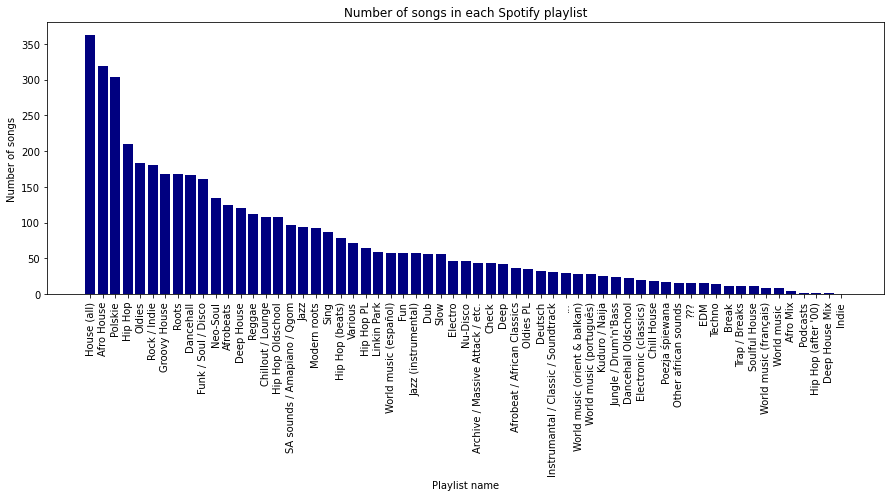

In [87]:
fig = plt.figure(figsize = (15, 5))

plt.bar(playlists_songs["PlaylistName"], playlists_songs["Songs"], color="navy")
plt.xticks(rotation= "vertical")
plt.xlabel("Playlist name")
plt.ylabel("Number of songs")
plt.title("Number of songs in each Spotify playlist")
plt.show()

In [ ]:
file2 = "C:/Users/Agnieszka/Downloads/Datasets/Music/my_spotify_data/MyData/Inferences.json"

Spotify_Inferences = json.load(open(file2, "r", encoding="utf8"))
Spotify_Inferences

# Inferences -> from https://support.spotify.com/uk/article/understanding-my-data/ :
# "We draw certain inferences about your interests and preferences based on your usage of the Spotify service and 
# using data obtained from our advertisers and other advertising partners. 
# This includes a list of market segments with which you are currently associated.  
# Depending on your settings, this data may be used to serve interest-based advertising to you within the 
# Spotify service."

# -> not useful for this analysis

In [ ]:
file3 = "C:/Users/Agnieszka/Downloads/Datasets/Music/my_spotify_data/MyData/Userdata.json"

Spotify_Userdata = json.load(open(file3, "r", encoding="utf8"))
Spotify_Userdata

# CreationTime: 2017-03-08

In [ ]:
file4 = "C:/Users/Agnieszka/Downloads/Datasets/Music/my_spotify_data/MyData/StreamingHistory0.json"

Spotify_StreamingHistory0 = json.load(open(file4, "r", encoding="utf8"))
Spotify_StreamingHistory0

# Other files: StreamingHistory1 / StreamingHistory2

# Information about streamings -> 
# "endTime": Date and time of when the stream ended
# "msPlayed": Stands for how many mili-seconds the track was listened.

In [11]:
range(len(Spotify_StreamingHistory0))

range(0, 10000)

In [37]:
StreamTime0 = []
for index in range(len(Spotify_StreamingHistory0)):
    StreamTime0.append(Spotify_StreamingHistory0[index]['endTime'])
    
len(StreamTime0)

10000

In [36]:
ArtistName0 = []
for index in range(len(Spotify_StreamingHistory0)):
    ArtistName0.append(Spotify_StreamingHistory0[index]['artistName'])
    
ArtistName0
len(ArtistName0)

10000

In [ ]:
file4A = "C:/Users/Agnieszka/Downloads/Datasets/Music/my_spotify_data/MyData/StreamingHistory1.json"

Spotify_StreamingHistory1 = json.load(open(file4A, "r", encoding="utf8"))
Spotify_StreamingHistory1

In [ ]:
StreamTime1 = []
for index in range(len(Spotify_StreamingHistory1)):
    StreamTime1.append(Spotify_StreamingHistory1[index]['endTime'])
    
StreamTime1

In [ ]:
ArtistName1 = []
for index in range(len(Spotify_StreamingHistory1)):
    ArtistName1.append(Spotify_StreamingHistory1[index]['artistName'])
    
ArtistName1

In [ ]:
file4B = "C:/Users/Agnieszka/Downloads/Datasets/Music/my_spotify_data/MyData/StreamingHistory2.json"

Spotify_StreamingHistory2 = json.load(open(file4B, "r", encoding="utf8"))
Spotify_StreamingHistory2

In [ ]:
StreamTime2 = []
for index in range(len(Spotify_StreamingHistory2)):
    StreamTime2.append(Spotify_StreamingHistory2[index]['endTime'])
    
StreamTime2

In [ ]:
ArtistName2 = []
for index in range(len(Spotify_StreamingHistory2)):
    ArtistName2.append(Spotify_StreamingHistory2[index]['artistName'])
    
ArtistName2

In [40]:
# Connect all lists 

# StreamTime0.extend(StreamTime1)

#len(StreamTime0) # 10000
#len(StreamTime1) # 10000
#len(StreamTime2) # 7988

StreamTime = StreamTime0 + StreamTime1 + StreamTime2
len(StreamTime)

27988

In [41]:
# Connect all lists 

# StreamTime0.extend(StreamTime1)

#len(ArtistName0) # 10000
#len(ArtistName1) # 10000
#len(ArtistName2) # 7988

ArtistNames = ArtistName0 + ArtistName1 + ArtistName2
len(ArtistNames)

27988

In [ ]:
file5 = "C:/Users/Agnieszka/Downloads/Datasets/Music/my_spotify_data/MyData/SearchQueries.json"

Spotify_SearchQueries = json.load(open(file5, "r", encoding="utf8"))
Spotify_SearchQueries

# A list of searches made : search time / device/platform used / search text / list of Uniform Resource Identifiers (URI) of the search results the user interacted with

In [42]:
# Data that will be used for further analysis

# StreamTime (list)
# ArtistNames (list)
# playlist_names (list)

b) Data from skiley.net

In [213]:
# Load one file to see the available features

test = pd.read_csv("C:/Users/Agnieszka/Downloads/Datasets/Music/Silkey_MySpotify/AfroHouse.csv")
test.head()

# Important: 'trackName' / 'artistName' / 'secondaryArtistsNames' /'trackDuration' / 'addedAt' (??) /
# "isLocal" - "stream" vs. "local" / 'trackPopularity' / 'artistPopularity' / 'artistFollowers' / 'artistGenres' /
# 'albumRecordLabel' / 'albumReleaseDate'

# not important: 'albumName'/ "trackNumber" / "addedBy" / 'albumArtistsNames' /'trackUrl'/ 
# 'artistUrl' / 'albumUrl'/ 'trackIsrc' (International Standard Recording Code)/ 'albumUpc' (Universal Product Code) / 
# 'albumType' / 'albumPopularity'

# artistPopularity: The popularity of the artist. The value will be between 0 and 100, 
# with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.
# https://developer.spotify.com/documentation/web-api/reference/


,trackName,artistName,albumName,trackDuration,trackNumber,addedBy,addedAt,isLocal,trackPopularity,artistPopularity,...,artistGenres,albumType,albumRecordLabel,albumReleaseDate,albumArtistsNames,trackUrl,artistUrl,albumUrl,trackIsrc,albumUpc
0,Fadjamou - TWOTEK Remix,Oumou Sangaré,Mogoya Remixed,04:54,6,leposia,2020-02-21T15:48:03Z,stream,33,55.0,...,"Afropop, Malian blues, Mande pop, Wassoulou, W...",album,NO FORMAT,2018-03-02,Oumou Sangaré,https://open.spotify.com/track/7o4FDJSXetDLaZQ...,https://open.spotify.com/artist/65CKKZilbcSKkA...,https://open.spotify.com/album/3tPkkxfJ4PMlVWH...,FR2W61700101,8.864470e+11
1,Sondela feat. Xolisa,David Mayer,Sondela EP,09:16,1,leposia,2020-05-08T20:45:25Z,stream,34,31.0,...,NaN,single,Connected,2018-05-11,David Mayer & Floyd Lavine,https://open.spotify.com/track/3JSbVbuKCAEKPQG...,https://open.spotify.com/artist/7Mf7RKErlQ5maE...,https://open.spotify.com/album/62Stp3OydYGdunK...,DEU671702764,8.803199e+11
2,Shango,Waajeed,Shango EP,05:38,2,leposia,2020-05-08T20:46:03Z,stream,24,29.0,...,"Detroit house, Experimental house",single,Dirt Tech Reck,2017-07-07,Waajeed,https://open.spotify.com/track/3nac7Q00wdPbA7E...,https://open.spotify.com/artist/4dXRZcf1AdzvwZ...,https://open.spotify.com/album/7heAeiemIsKYZtc...,ushm21722078,1.910619e+11
3,Sittin' Here - Boddhi Satva Ancestral Soul Remix,St Germain,Sittin' Here (Remixes),06:27,2,leposia,2020-05-08T20:46:16Z,stream,20,59.0,...,"Downtempo, Electronica, Jazztronica, Nu jazz",single,Parlophone (France),2016-03-11,St Germain,https://open.spotify.com/track/4LbkNYxou1Z3uKi...,https://open.spotify.com/artist/484sZUYmnRXN84...,https://open.spotify.com/album/4XgRSFKNjnzrKvU...,FR92S1500040,1.902960e+11
4,"99,9 - Alix Alvarez Sole Channel Remix",Minimoogli,"99,9 Remixes",06:22,1,leposia,2020-05-08T20:49:27Z,stream,0,5.0,...,NaN,single,Tubetracks,2008-05-24,Minimoogli,https://open.spotify.com/track/5SL7Ht67ZGlRPFg...,https://open.spotify.com/artist/5crLJQJosOleex...,https://open.spotify.com/album/76QL5IslNgG8Cn2...,FR6V80803305,3.661585e+12


In [215]:
# Dataset with all playlists
import glob
df_Silkey = pd.concat([pd.read_csv(f) for f in glob.glob("C:/Users/Agnieszka/Downloads/Datasets/Music/Silkey_MySpotify/" + "*.csv")], ignore_index=True)
len(df_Silkey)
# 4422 / 4444

4069

c) Data from sortyourmusic.playlistmachinery.com

In [216]:
test2 = pd.read_excel("C:/Users/Agnieszka/Downloads/Datasets/Music/SortYourMusic_20210305.xlsx", sheet_name="AfroHouse")
test2.head()


# Double information: Title / Artist / Release / Length / Pop. / 
# not important: RND

,#,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND
0,1,Fadjamou - TWOTEK Remix,Oumou Sangaré,2018-03-02 00:00:00,129.0,59.0,84.0,-9.0,46.0,04:54:00,5.0,33.0,4111.0
1,2,Sondela feat. Xolisa,David Mayer,2018-05-11 00:00:00,122.0,68.0,77.0,-8.0,14.0,09:17:00,1.0,34.0,7037.0
2,3,Shango,Waajeed,2017-07-07 00:00:00,127.0,62.0,85.0,-11.0,60.0,05:38:00,6.0,24.0,5515.0
3,4,Sittin' Here - Boddhi Satva Ancestral Soul Remix,St Germain,2016-03-11 00:00:00,122.0,72.0,79.0,-8.0,52.0,06:28:00,13.0,20.0,3277.0
4,5,"99,9 - Alix Alvarez Sole Channel Remix",Minimoogli,2008-05-24 00:00:00,126.0,86.0,80.0,-9.0,66.0,06:22:00,0.0,0.0,281.0


In [90]:
#import os
#files = os.listdir("C:/Users/Agnieszka/Downloads/Datasets/Music/SortYourMusic/")
#files

In [217]:
# Dataset with all playlists

df_SortYourMusic = pd.concat([pd.read_excel(f) for f in glob.glob("C:/Users/Agnieszka/Downloads/Datasets/Music/SortYourMusic/" + "*.xlsx")], ignore_index=True)
len(df_SortYourMusic)

4069

**Datasets for further analysis and ML models**

a) Dataset with data from all playlists 

In [218]:
df_Silkey.reset_index(inplace=True)
df_Silkey.head()

,index,trackName,artistName,albumName,trackDuration,trackNumber,addedBy,addedAt,isLocal,trackPopularity,...,artistGenres,albumType,albumRecordLabel,albumReleaseDate,albumArtistsNames,trackUrl,artistUrl,albumUrl,trackIsrc,albumUpc
0,0,"My Woman, My Everything (feat. Wandecoal)",Patoranking,"My Woman, My Everything (feat. Wandecoal) - Si...",03:53,1.0,leposia,2018-08-19T20:44:37Z,stream,54.0,...,"Afro dancehall, Afropop, Azontobeats, Gqom, Ni...",single,Greensleeves Records,2015-07-06,Patoranking,https://open.spotify.com/track/5MAScTGPHzWAeiv...,https://open.spotify.com/artist/2hKQc001G7ggs3...,https://open.spotify.com/album/0cUhwhoX9Yi7vhJ...,GBBZV1555523,6.018112e+11
1,1,Pana,Tekno,Pana,04:02,1.0,leposia,2018-08-19T20:51:51Z,stream,59.0,...,"Afro dancehall, Afropop, Azontobeats, Nigerian...",single,Columbia,2016-12-20,Tekno,https://open.spotify.com/track/3ddd0nUY2jZtPYz...,https://open.spotify.com/artist/6IhG3Yxm3UW98j...,https://open.spotify.com/album/62sUZK9tqrSH3AM...,USSM11610316,8.864463e+11
2,2,Jogodo,Tekno,Jogodo,04:23,1.0,leposia,2018-08-19T20:51:54Z,stream,44.0,...,"Afro dancehall, Afropop, Azontobeats, Nigerian...",single,MADE MEN MUSIC GROUP,2018-04-19,Tekno,https://open.spotify.com/track/2irIMb2mjl8lgVz...,https://open.spotify.com/artist/6IhG3Yxm3UW98j...,https://open.spotify.com/album/6aR2Z7ByqS9rxAz...,GBZB51800047,5.050581e+12
3,3,Duro,Tekno,Duro,03:32,1.0,leposia,2018-08-19T20:52:04Z,stream,0.0,...,"Afro dancehall, Afropop, Azontobeats, Nigerian...",single,Made Men Music Group,2015-06-22,Tekno,https://open.spotify.com/track/4zI3yq6BBpbnKZY...,https://open.spotify.com/artist/6IhG3Yxm3UW98j...,https://open.spotify.com/album/2RtngUBJGTBgQuY...,UK3AZ1512397,6.321815e+11
4,4,Samantha,Tekno,Samantha,03:49,1.0,leposia,2018-08-19T20:52:24Z,stream,42.0,...,"Afro dancehall, Afropop, Azontobeats, Nigerian...",single,MADE MEN MUSIC GROUP,2017-06-09,Tekno,https://open.spotify.com/track/0rI1YdcUXmvWd6R...,https://open.spotify.com/artist/6IhG3Yxm3UW98j...,https://open.spotify.com/album/4JS9Fgzb4XzmWMQ...,GBZB51700035,5.050581e+12


In [219]:
df_SortYourMusic.reset_index(inplace=True)
df_SortYourMusic.head()

,index,#,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND
0,0,1,"My Woman, My Everything (feat. Wandecoal)",Patoranking,2015-07-06 00:00:00,112.0,85.0,90.0,-3.0,63.0,03:54:00,4.0,54.0,7655.0
1,1,2,Pana,Tekno,2016-12-20 00:00:00,73.0,55.0,55.0,-7.0,66.0,04:03:00,31.0,58.0,5685.0
2,2,3,Jogodo,Tekno,2018-04-19 00:00:00,100.0,77.0,74.0,-5.0,82.0,04:23:00,38.0,44.0,8581.0
3,3,4,Duro,Tekno,2015-06-22 00:00:00,90.0,84.0,74.0,-4.0,97.0,03:32:00,28.0,0.0,400.0
4,4,5,Samantha,Tekno,2017-06-09 00:00:00,106.0,75.0,83.0,-3.0,79.0,03:50:00,3.0,42.0,6739.0


In [220]:
All_songs = df_Silkey.merge(df_SortYourMusic, on="index")

In [198]:
#All_songs[["trackName", "Title"]].iloc[4000:4040]

In [221]:
All_songs.columns

Index(['index', 'trackName', 'artistName', 'albumName', 'trackDuration',
       'trackNumber', 'addedBy', 'addedAt', 'isLocal', 'trackPopularity',
       'artistPopularity', 'secondaryArtistsNames', 'albumPopularity',
       'artistFollowers', 'artistGenres', 'albumType', 'albumRecordLabel',
       'albumReleaseDate', 'albumArtistsNames', 'trackUrl', 'artistUrl',
       'albumUrl', 'trackIsrc', 'albumUpc', '#', 'Title', 'Artist', 'Release',
       'BPM', 'Energy', 'Dance', 'Loud', 'Valence', 'Length', 'Acoustic',
       'Pop.', 'RND'],
      dtype='object')

In [222]:
# Drop columns

# df_SortYourMusic: 
# Title / Artist / Release / Length / Pop. <- Double information & not important: RND
# df_Silkey 
# # not important: 'albumName'/ "trackNumber" / "addedBy" / 'albumArtistsNames' /'trackUrl'/ 
# 'artistUrl' / 'albumUrl'/ 'trackIsrc' (International Standard Recording Code)/ 'albumUpc' (Universal Product Code) / 
# 'albumType' / 'albumPopularity'


All_songs_clean = All_songs.drop(columns=["albumName", 
                            "trackNumber",
                            "addedBy",
                            "albumArtistsNames",
                            "trackUrl",
                            "artistUrl",
                            "albumUrl",
                            "trackIsrc",
                            "albumUpc",
                            "albumType",
                            "albumPopularity",
                            'Title', 
                            'Artist', 
                            'Release', 
                            "Length", 
                            "Pop.",
                            "RND",
                            '#',          
                           ], axis=0)

In [223]:
All_songs_clean.head()

,index,trackName,artistName,trackDuration,addedAt,isLocal,trackPopularity,artistPopularity,secondaryArtistsNames,artistFollowers,artistGenres,albumRecordLabel,albumReleaseDate,BPM,Energy,Dance,Loud,Valence,Acoustic
0,0,"My Woman, My Everything (feat. Wandecoal)",Patoranking,03:53,2018-08-19T20:44:37Z,stream,54.0,61.0,Wande Coal,149884.0,"Afro dancehall, Afropop, Azontobeats, Gqom, Ni...",Greensleeves Records,2015-07-06,112.0,85.0,90.0,-3.0,63.0,4.0
1,1,Pana,Tekno,04:02,2018-08-19T20:51:51Z,stream,59.0,62.0,NaN,175849.0,"Afro dancehall, Afropop, Azontobeats, Nigerian...",Columbia,2016-12-20,73.0,55.0,55.0,-7.0,66.0,31.0
2,2,Jogodo,Tekno,04:23,2018-08-19T20:51:54Z,stream,44.0,62.0,NaN,175849.0,"Afro dancehall, Afropop, Azontobeats, Nigerian...",MADE MEN MUSIC GROUP,2018-04-19,100.0,77.0,74.0,-5.0,82.0,38.0
3,3,Duro,Tekno,03:32,2018-08-19T20:52:04Z,stream,0.0,62.0,NaN,175849.0,"Afro dancehall, Afropop, Azontobeats, Nigerian...",Made Men Music Group,2015-06-22,90.0,84.0,74.0,-4.0,97.0,28.0
4,4,Samantha,Tekno,03:49,2018-08-19T20:52:24Z,stream,42.0,62.0,NaN,175849.0,"Afro dancehall, Afropop, Azontobeats, Nigerian...",MADE MEN MUSIC GROUP,2017-06-09,106.0,75.0,83.0,-3.0,79.0,3.0


In [225]:
len(All_songs_clean)

4069

In [214]:
# to do: 
# - check on duplicates
# - check on NaN
# - Split "Genre" values
# - Datatypes (dates/ numeric values/ etc.)

2) Dataset for machine learning models

3) Datasets for EDA  

In [ ]:
# EDA only for selected playlists: Afro House / Hip Hop / ...